## 
CONUS

Plots Comparisons

Evgam vs extRemes

In [41]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import cftime
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from copy import copy
import geopandas as gpd
from shapely.geometry import Point

In [42]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [43]:
import warnings
warnings.filterwarnings('ignore')

# READ EVGAM output FILES

In [44]:
yearb=1941
yeare=2025

lon_min = 235
lon_max = 293
lat_min = 25
lat_max = 50

dirin ='/Users/ghervieux/TXx'

ds0 = xr.open_dataset(f'{dirin}/TXx_NorthAmerica_ij_glost_extremes_1941_2025.nc')
rl1000 = ds0['rl100']
loc0 = ds0['location'] 
scale0 = ds0['scale'] 
shape0 = ds0['shape'] 

ds1 = xr.open_dataset(f'{dirin}/TXx_evgam_movingwindow_test1_1941_2025.nc')
rl1001 = ds1['rl100'] 
loc1 = ds1['location'] 
scale1 = ds1['scale'] 
shape1 = ds1['shape'] 

units = '°F'

Tlabels = ['extRemes (time covariate)','Evgam (space + time covariates)']

##
Evgam :    covariates: Elevation (elevation), Global Land and Ocean Average Temperature Anomalies (GLOST)

fmla_gev <- list(

TXx     

        ~ s(elevation,bs='cr',k=4) + s(cell, bs="mrf", k=20, xt = list(nb = nb)) +s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) ,

        ~ s(elevation,bs='cr',k=4) + s(cell, bs="mrf", k=20, xt = list(nb = nb)) +s(cell,k=12, bs="mrf", xt = list(nb = nb),by=glost) , 

        ~                            s(cell, bs="mrf", k=20, xt = list(nb = nb)))

In [45]:
Trl100 = [rl1000,rl1001]
Tloc = [loc0,loc1]
Tscale = [scale0,scale1]
Tshape = [shape0,shape1]
#

# PLOT Return Level 100

Text(0.5, 0.98, 'Return Level 100year')

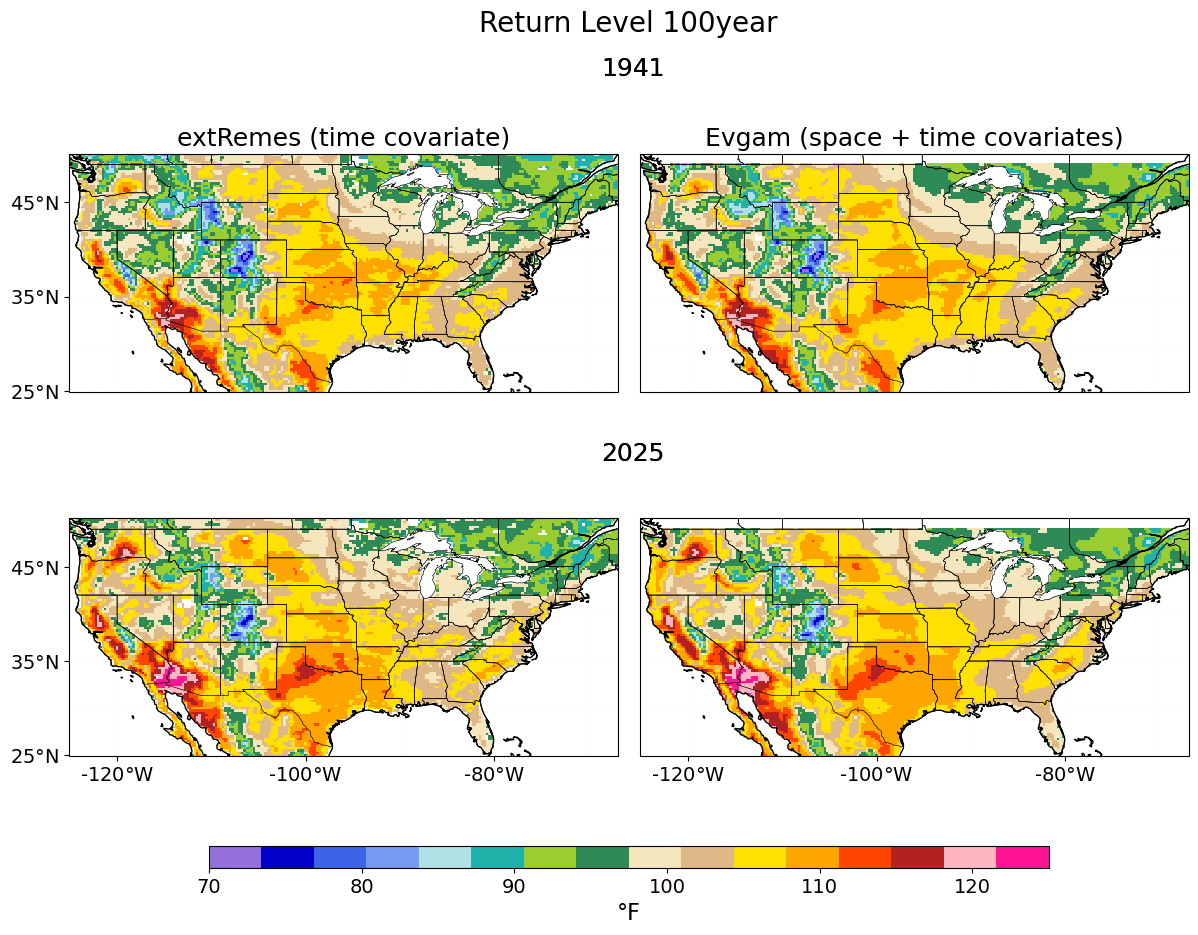

In [53]:
clevs = np.arange(70,130,5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Trl100[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  cc = Trl100[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
plt.suptitle(f'Return Level 100year',fontsize=20)  

Text(0.5, 0.98, 'Return Level 100year Difference 2025 - 1941')

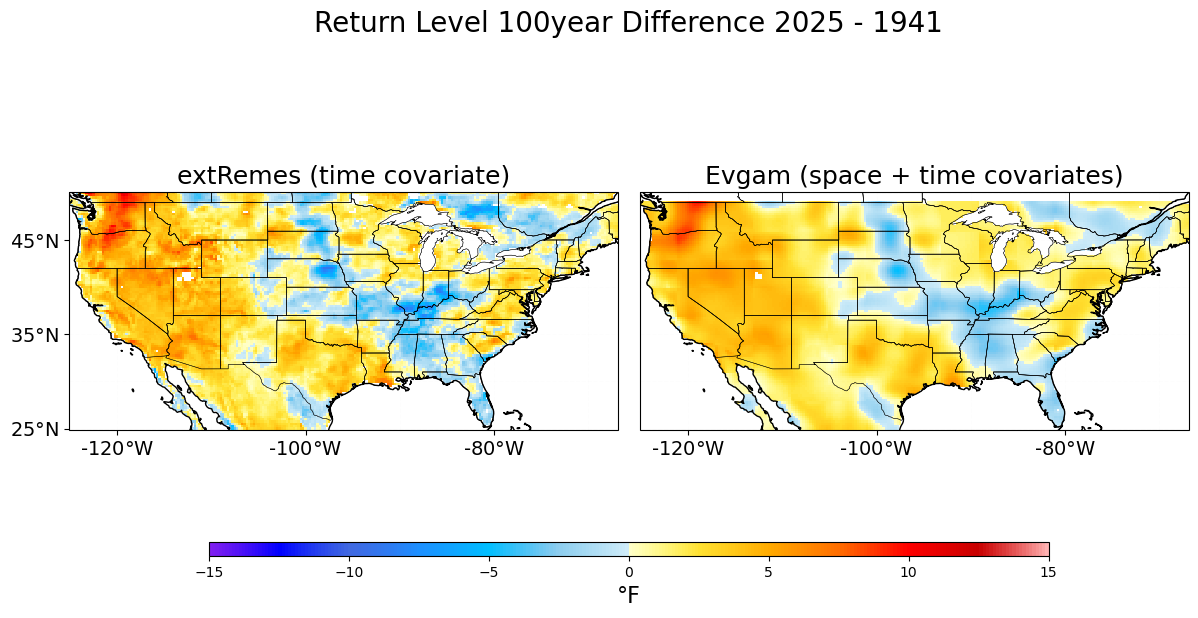

In [56]:
clevs = np.arange(-15,16,1)
cmap = plt.get_cmap(cmaps.ncl_default,len(clevs)).copy()

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = (Trl100[ix].sel(time=yeare)-Trl100[ix].sel(time=yearb)).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)

####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    


for ix in range(0,1,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.set_label(label=units,fontsize=16)
plt.suptitle(f'Return Level 100year Difference {yeare} - {yearb}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter')

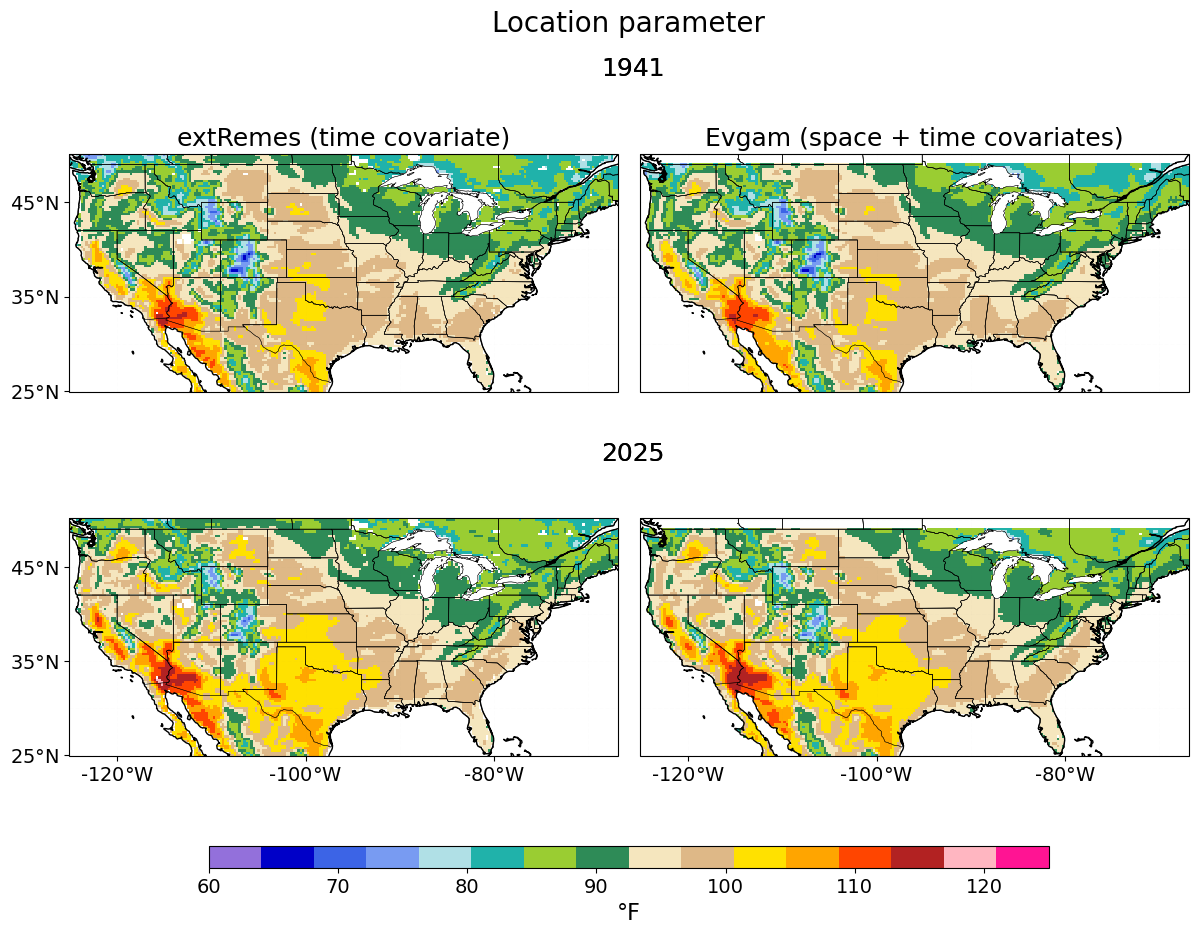

In [57]:
clevs = np.arange(60,130,5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tloc[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  cc = Tloc[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 

for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=units,fontsize=16)
#
plt.suptitle(f'Location parameter',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter')

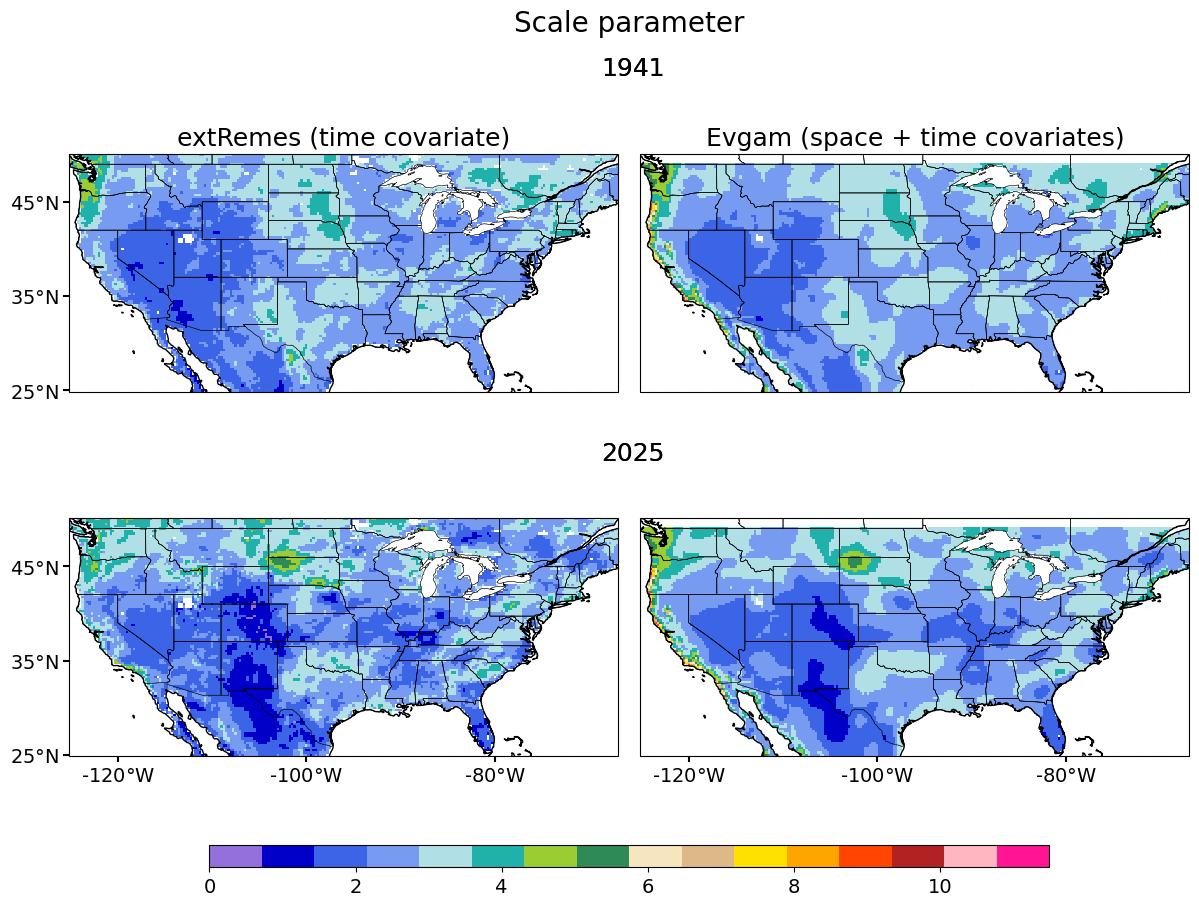

In [60]:
clevs = np.arange(0,12,.5)
cmap = plt.get_cmap(cmaps.amwg,len(clevs)).copy()

proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,11),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.25,left=0.1, right=0.9,top=0.9,hspace=0.04,wspace=0.04)
ax = ax.flatten()
for ix in range(0,2):
  cc = Tscale[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  cc = Tscale[ix].sel(time=yeare).plot.pcolormesh(ax=ax[ix+2],cmap=cmap,vmin=clevs[0],vmax=clevs[-1],add_colorbar=False)
  fig.text(0.48,0.92,yearb,fontsize=18)
  fig.text(0.48,0.57,yeare,fontsize=18)
  ####
for ix in range(0,len(ax)):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
 
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  if ix >=len(ax)-2:
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].set_title('',fontsize=18)  
  elif ix <=1:
    ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)    
  else:
    ax[ix].set_title('',fontsize=18) 
for ix in range(0,3,2): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
plt.suptitle(f'Scale parameter',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=1941')

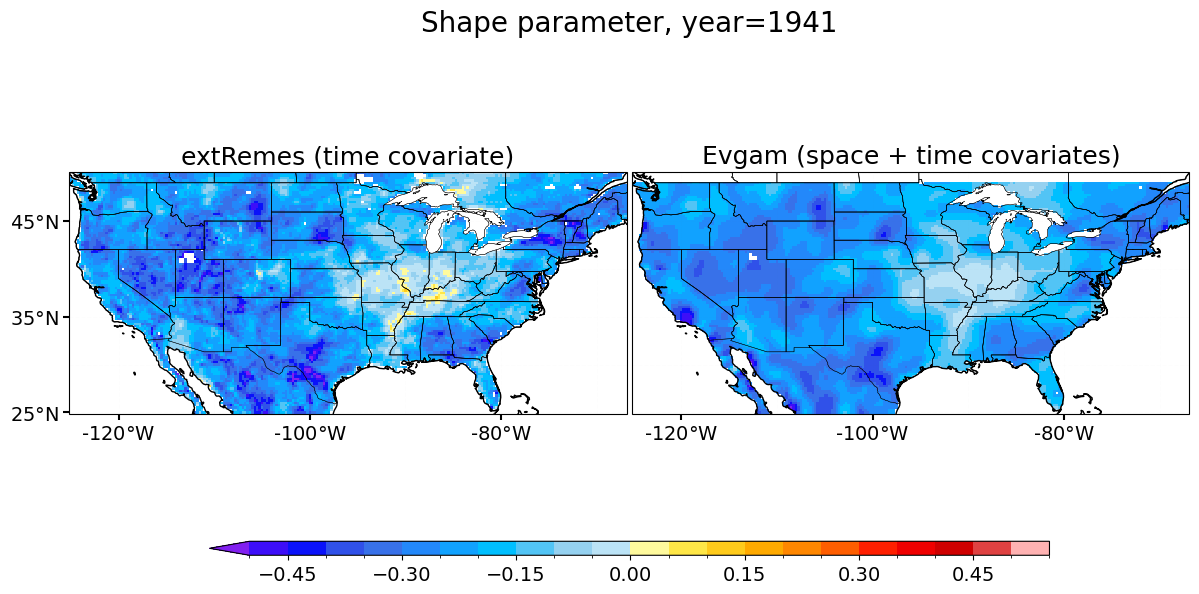

In [64]:
clevs = np.arange(-0.5,0.6,0.05)
cmap = plt.get_cmap(cmaps.ncl_default,len(clevs)).copy()

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,2): 
  cc = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmap,levels=clevs,add_colorbar=False)

for ix in range(0,2):
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')
  ax[ix].set_title(f'{Tlabels[ix]}',fontsize=18)  
  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

for ix in range(0,1): 
  ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
  ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label='',fontsize=16)
#
plt.suptitle(f'Shape parameter, year={yearb}',fontsize=20)  

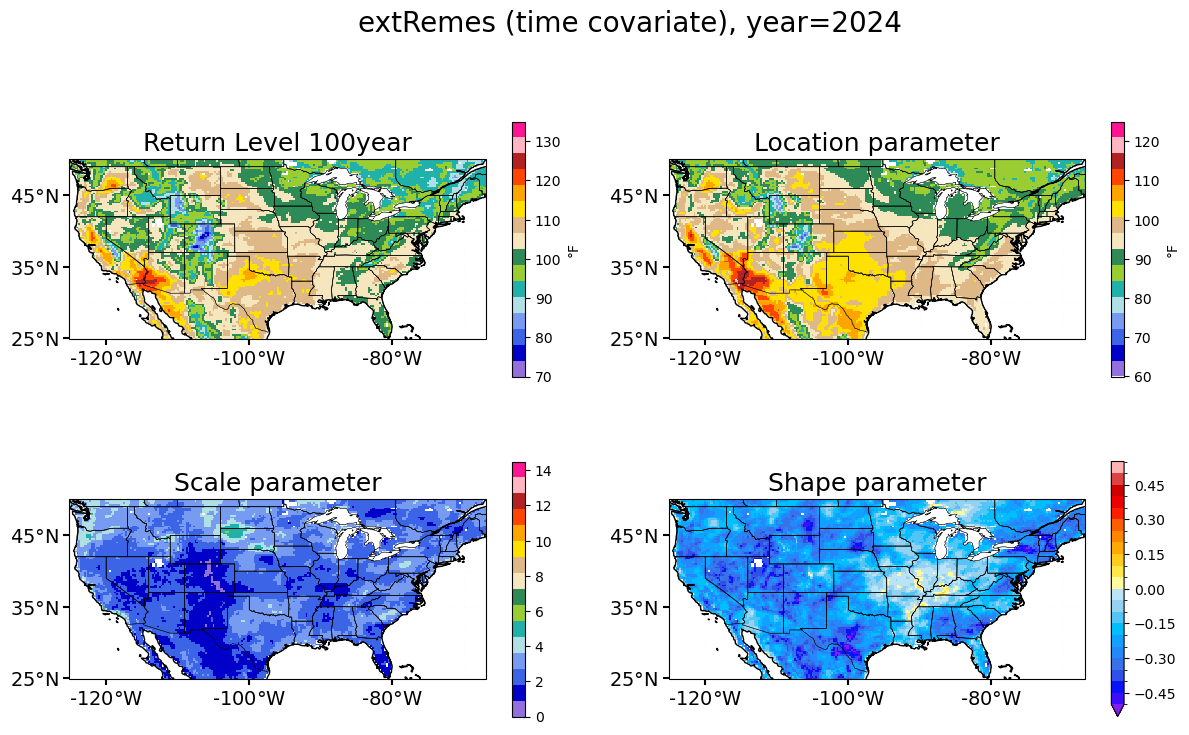

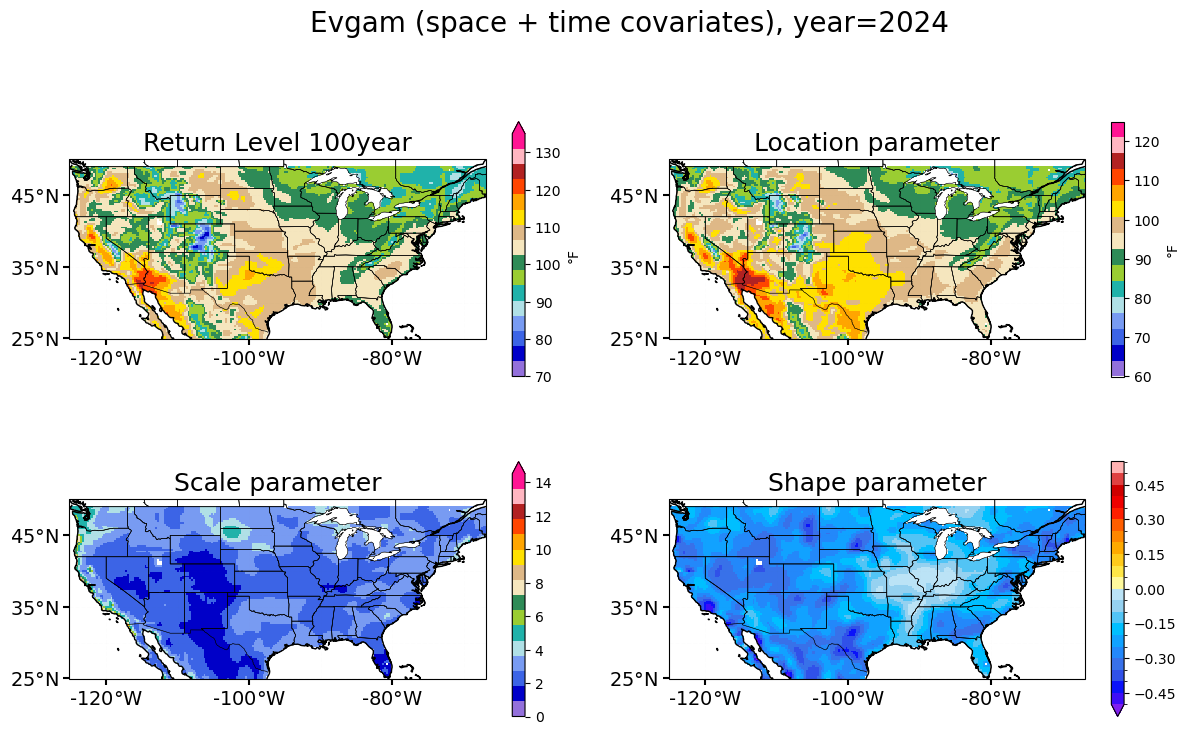

In [66]:
Tyears = [2024]
it = 1
proj=ccrs.PlateCarree()
for it in range(0,2):
 for iyear in Tyears:

  fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
  plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1, right=0.9,wspace=0.15,hspace=-0.2)
  ax = ax.flatten()
  clevs = np.arange(70,140,5)
  Trl100[it].sel(time=iyear).plot.pcolormesh(ax=ax[0],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':units,'shrink':0.6})
  ax[0].set_title(f'Return Level 100year',fontsize=18)  
  clevs = np.arange(60,130,5)
  Tloc[it].sel(time=iyear).plot.pcolormesh(ax=ax[1],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':units,'shrink':0.6})
  ax[1].set_title(f'Location parameter',fontsize=18)  
  clevs = np.arange(0,15,.5)
  Tscale[it].sel(time=iyear).plot.pcolormesh(ax=ax[2],cmap=cmaps.amwg,vmin=clevs[0],vmax=clevs[-1],cbar_kwargs={'label':'','shrink':0.6})
  ax[2].set_title(f'Scale parameter',fontsize=18)  
  clevs = np.arange(-0.5,0.6,0.05)
  Tshape[it].sel(time=iyear).plot.pcolormesh(ax=ax[3],cmap=cmaps.ncl_default,levels=clevs,cbar_kwargs={'label':'','shrink':0.6})
  ax[3].set_title(f'Shape parameter',fontsize=18)  
  ####
  for ix in range(0,4): 
    grd = ax[ix].gridlines(
        draw_labels=False, 
        color='gray', alpha=0.01, linestyle='--')

    ax[ix].set_xlabel('')
    ax[ix].set_ylabel('')
    ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
    ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
    ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
    ax[ix].coastlines()
  #
  plt.suptitle(f'{Tlabels[it]}, year={iyear}',fontsize=20)  
  plt.show()